In [24]:
import matplotlib.pyplot as plt
import pickle

RES_DIR = ("/home/rgaurav/projects/def-anarayan/rgaurav/ECE-5984-Final-Project/exp_results/"
           "circle_task/")

In [25]:
actor_action_probs = pickle.load(open(RES_DIR+"./full_actor_action_probs.p", "rb"))
actor_action_choices = pickle.load(open(RES_DIR+"./full_actor_choices.p", "rb"))
critic_value = pickle.load(open(RES_DIR+"./full_critic_value.p", "rb"))
env_rewards = pickle.load(open(RES_DIR+"./full_env_rewards.p", "rb"))
sim_trange = pickle.load(open(RES_DIR+"./sim_trange.p", "rb"))

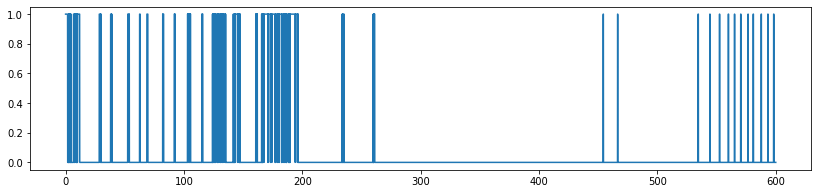

In [26]:
plt.figure(figsize=(14, 3))
plt.plot(sim_trange, env_rewards)